# Advanced Linear Regression

## House  Case Study

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

In [823]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [824]:
#Import NumPy and Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Step 1: Reading and Understanding the Data

##### A. Importing Csv File


In [825]:
House = pd.read_csv("train.csv")
House.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### B. Inspect the various aspects of the housing dataframe

In [826]:
House.shape

(1460, 81)

In [827]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [828]:
House.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data Cleaning

##### A.  Replace `NA` with `None` in columns (where  `NA`  does not mean null or blank )

In [829]:
# Create A list of categorical column where `NA` does not mean null or blank 
Z=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [830]:
#Find length of list
n=len(Z)

#Replace `NA` with `None`
for i in range(0,n):
    House[Z[i]]=House[Z[i]].fillna('None')

##### B. Check Column wise null value 

In [831]:
# Find column wise null value and then sort to descending
House.isnull().sum(axis=0).sort_values(ascending=False).head(10)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

##### C. Impute Numeric Column with mean value

In [832]:
House.fillna(House.mean(),inplace=True)

##### D. Drop Unrequired Columns

In [833]:
House=House.drop(columns=['Id'], axis = 1)

##### E. Check Row wise null value

In [834]:
# Find row wise null value
House.isnull().sum(axis=1).sort_values(ascending=False).head(20)

1379    1
1459    0
480     0
481     0
482     0
483     0
484     0
485     0
486     0
487     0
488     0
489     0
478     0
490     0
491     0
492     0
493     0
494     0
495     0
496     0
dtype: int64

#####  F. Outlier Treatment

In [835]:
num_columns=House.select_dtypes(exclude='object').columns
n=len(num_columns)

In [836]:
print('Shape of DataFrame Before Outlier Treatment :- ',House.shape)
for i in range(0,n): 
    Q1 = House[num_columns[i]].quantile(0.02)
    Q3 = House[num_columns[i]].quantile(0.98)
    IQR = Q3 - Q1
    House = House[(House[num_columns[i]] >= Q1 - 1.5*IQR) & (House[num_columns[i]] <= Q3 + 1.5*IQR)]
print('Shape of DataFrame After Outlier Treatment :- ',House.shape)

Shape of DataFrame Before Outlier Treatment :-  (1460, 80)
Shape of DataFrame After Outlier Treatment :-  (1389, 80)


Number of Records left after data cleaning is 1389 which is 95 % of initial data (1460 records)

## Step 2: Data Preparation

##### A. Create New Columns

In [837]:
#Create New Columns `Remodeling Done` from 'YearBuilt' & 'YearRemodAdd' 

House['Remodeling Done']=np.where(House['YearBuilt']!=House['YearRemodAdd'], 'Yes', 'no')

In [838]:
# Create variable Year having Curreny Year value
Year = pd.datetime.now().year

#Create New Columns `House age` which denotes how old is house
House['House Age']=Year - House['YearBuilt']

#Create New Columns `Garage age` which denotes how old is Garage
House['Garage Age']=Year - House['GarageYrBlt']

#Create New Columns `Last Sold` which denotes how many years before the house was sold
House['Last Sold']=Year - House['YrSold'] 

In [839]:
#After creating new columns we can Drop intial columns(the columns from which new columns are created)
House.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace = True)

##### B. Create Dummy Variables

In [840]:
# Create Columns having dummy variables
Categorical_variable=House.select_dtypes(include='object').columns
Dummy_Columns = pd.get_dummies(House[Categorical_variable], drop_first = True)

In [841]:
# Add the dummy Columns to the original House dataframe
House = pd.concat([House, Dummy_Columns], axis = 1)

In [842]:
# Drop Categorical as we have created the dummies for it
House.drop(Categorical_variable, axis = 1, inplace = True)

##### C. Check the House dataframe 

In [843]:
print('Shape of Datafrane is ',House.shape)
House.head()

Shape of Datafrane is  (1389, 251)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Remodeling Done_no
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,1,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,1,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,1,0,1


##  Step 3. Rescaling the Features using MinMax scaling

##### Dividing Train Data into X and Y sets for the model building

In [844]:
# Divide data into x and y
Y=House['SalePrice']
X=House.drop(columns=['SalePrice'],axis=1)

In [845]:
# import scale
from sklearn.preprocessing import scale

In [846]:
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

##### Check if Y variable is normally distributed(not skewed)

Text(0.5, 0, 'Value of Y')

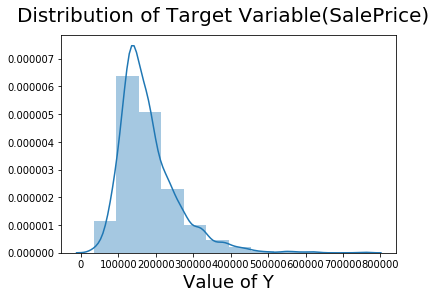

In [847]:
fig = plt.figure()
sns.distplot((Y), bins = 12)
fig.suptitle('Distribution of Target Variable(SalePrice)', fontsize = 20)                  # Plot heading 
plt.xlabel('Value of Y', fontsize = 18)                         # X-label

From the above graph it can be seen that Y variable is not nonrmally disttibuted hence transgormaing Y variable is required

Text(0.5, 0, 'Value of Y')

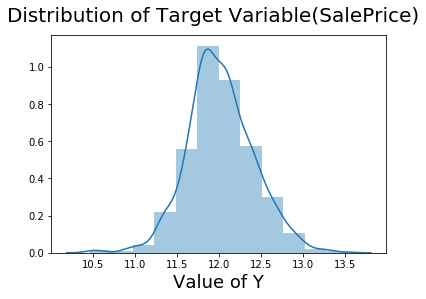

In [848]:
#  logarithmic Transformation  of Y variable
Y=np.log(Y)
fig = plt.figure()
sns.distplot((Y), bins = 12)
fig.suptitle('Distribution of Target Variable(SalePrice)', fontsize = 20)                  # Plot heading 
plt.xlabel('Value of Y', fontsize = 18)                         # X-label

## Step 4. Splitting the Data into Training and Testing Sets

In [849]:
# split into train and test
from sklearn.model_selection  import train_test_split

In [850]:
# split into train and test
X_train, X_test, Y_train, Y_test  =train_test_split(X,Y, train_size=0.7,test_size = 0.3, random_state=100)

## Step 5. Model Building

##### A. Using Recursive feature elimination

In [851]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [852]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, Y_train)
print( X_train.columns)
print( House.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Remodeling Done_no'],
      dtype='object', length=250)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Remodeling Done_no'],
      dtype='object', length=251)


In [853]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'Fireplaces', 'GarageArea', 'House Age', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Condition2_PosN', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_PConc',
       'BsmtQual_None', 'BsmtCond_None', 'BsmtFinType1_None',
       'BsmtFinType2_None', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_None', 'GarageFinish_None',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None',
       'GarageCond_Po', 'GarageCond_TA', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

##### B. Building model using statsmodel, for the detailed statistics

In [854]:
import statsmodels.api as sm  

###### i. Create model with RFE selected variables

In [855]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(list(Y_train),X_train_rfe).fit()  

# Print summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     250.6
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:43:27   Log-Likelihood:                 734.03
No. Observations:                 972   AIC:                            -1384.
Df Residuals:                     930   BIC:                            -1179.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

In [856]:
X_train_rfe.head(5)

,const,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_New,SaleCondition_Partial
1223,1.0,-0.756987,-0.068118,0.401709,-1.008440,-0.286498,0.473370,-0.655229,-0.887033,0.565485,...,-0.233816,-0.046524,0.329453,-0.158405,-0.07117,-0.233816,-0.07117,0.310307,-0.303284,-0.30751
328,1.0,-0.165861,-0.790380,0.401709,-0.464684,2.064661,-1.279359,-1.048377,-1.447107,0.352351,...,-0.233816,-0.046524,0.329453,6.312919,-0.07117,-0.233816,-0.07117,-3.222615,-0.303284,-0.30751
790,1.0,-0.076924,0.654143,0.401709,0.104417,-0.286498,-0.250192,-0.269273,-0.576179,1.262802,...,-0.233816,-0.046524,0.329453,-0.158405,-0.07117,-0.233816,-0.07117,0.310307,-0.303284,-0.30751
536,1.0,-0.592530,-0.068118,-1.418761,-1.008440,-0.286498,0.531795,-0.592901,-0.844157,1.072835,...,-0.233816,-0.046524,0.329453,-0.158405,-0.07117,-0.233816,-0.07117,0.310307,-0.303284,-0.30751
1162,1.0,0.140053,-0.790380,-2.328996,0.733423,-0.286498,1.821624,2.595432,2.626154,-0.794401,...,-0.233816,-0.046524,0.329453,-0.158405,-0.07117,-0.233816,-0.07117,0.310307,-0.303284,-0.30751


## Step 6. Regularization

### 1. Ridge Regression

In [857]:
# Importing RFE and LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

##### Create list of alphas to tune

In [858]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
params = {'alpha':  [0.001, 0.01, 0.1, 5, 10,20,30,40]}
#params = {'alpha': [1,2,3,4,5,10,12,15,18,20,30,40,50,100,200,400,500]}

###### i. Create model 

In [859]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, Y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 5, 10, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

###### ii. Create Dataframe with results of model with different value of alpha

In [860]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0092,0.000748,0.0032,3.999472e-04,0.001,{'alpha': 0.001},-0.092667,-0.084093,-0.095639,-0.084215,...,-0.089130,0.004569,5,-0.078179,-0.081769,-0.078675,-0.082263,-0.079977,-0.080173,0.001623
1,0.0084,0.000490,0.0030,9.536743e-08,0.01,{'alpha': 0.01},-0.092667,-0.084089,-0.095640,-0.084214,...,-0.089129,0.004571,4,-0.078180,-0.081770,-0.078675,-0.082264,-0.079978,-0.080173,0.001624
2,0.0150,0.013505,0.0034,4.899014e-04,0.1,{'alpha': 0.1},-0.092665,-0.084056,-0.095650,-0.084205,...,-0.089120,0.004583,3,-0.078188,-0.081777,-0.078677,-0.082279,-0.079990,-0.080182,0.001626
3,0.0112,0.005419,0.0038,4.000902e-04,5,{'alpha': 5},-0.092587,-0.083199,-0.096090,-0.083863,...,-0.088929,0.004963,1,-0.078652,-0.082287,-0.078785,-0.082840,-0.080497,-0.080612,0.001730
4,0.0084,0.000490,0.0036,4.898624e-04,10,{'alpha': 10},-0.092565,-0.083203,-0.096402,-0.083873,...,-0.089040,0.005048,2,-0.079059,-0.082675,-0.078959,-0.083229,-0.080945,-0.080973,0.001772


###### iii. Create Graph

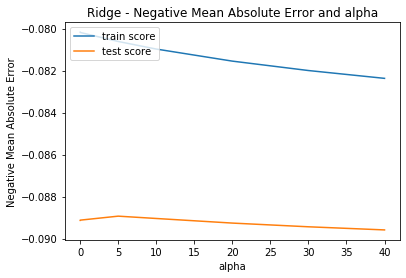

In [861]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Graph Analysis :- 

From the Above graph it can be observed that Optimal value of alpha for Ridge Regression is `5`

##### iv. Create Model with alpha=`5`

In [862]:
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, Y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

##### v. Check Coefficient value of different variables(columns)

In [863]:
data={'Features':X_train_rfe.columns,'Coefficient Value':ridge.coef_}
Ridge_df=pd.DataFrame(data)
Ridge_df.sort_values(by=['Coefficient Value'],ascending=False)
Ridge_df.count()
print(len(X_train_rfe.columns))

51


### 2. Lasso Regression

##### Create list of alphas to tune

In [864]:
# list of alphas to tune
#params = {'alpha': [0.00001,0.0001,0.001,0.005,0.01]}
params = {'alpha': [0.0001,0.0002,0.0005, 0.001, 0.002, 0.005]}
#params = {'alpha': [1,2,3,4,5,10,12,15,18,20,30,40,50,100,200,400,500,800,1000,2000,3000,4000,5000]}

###### i. Create model 

In [865]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, Y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002,
                                   0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

###### ii. Create Dataframe with results of model with different value of alpha

In [866]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0910,0.010237,0.0050,2.529790e-03,0.0001,{'alpha': 0.0001},-0.092694,-0.083760,-0.095604,-0.084096,...,-0.089020,0.004664,2,-0.078282,-0.081897,-0.078762,-0.082449,-0.080210,-0.080320,0.001650
1,0.0790,0.007975,0.0036,4.899208e-04,0.0002,{'alpha': 0.0002},-0.092725,-0.083470,-0.095781,-0.083963,...,-0.088983,0.004813,1,-0.078423,-0.082070,-0.078880,-0.082644,-0.080399,-0.080483,0.001674
2,0.0340,0.004243,0.0032,3.999949e-04,0.0005,{'alpha': 0.0005},-0.093101,-0.082817,-0.096576,-0.083628,...,-0.089108,0.005318,3,-0.079039,-0.082696,-0.079286,-0.083442,-0.081060,-0.081105,0.001765
3,0.0190,0.000894,0.0030,1.784161e-07,0.001,{'alpha': 0.001},-0.093764,-0.083306,-0.097148,-0.084048,...,-0.089761,0.005395,4,-0.080342,-0.084070,-0.079952,-0.084893,-0.082380,-0.082327,0.001960
4,0.0132,0.000748,0.0028,3.999472e-04,0.002,{'alpha': 0.002},-0.094870,-0.083354,-0.098396,-0.083557,...,-0.090220,0.006008,5,-0.081840,-0.085605,-0.081209,-0.085809,-0.084253,-0.083743,0.001899


###### iii. Create Graph

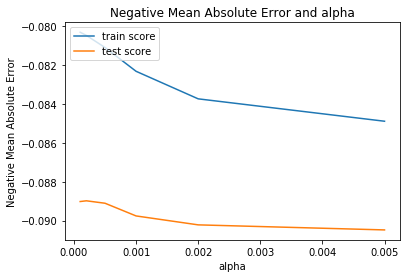

In [867]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Graph Analysis :- 

From the Above graph it can be observed that Optimal value of alpha for Lasso  Regression is `0.0002`

##### iv. Create Model with alpha=`0.0002`

In [868]:
alpha =0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, Y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

##### v. Check Coefficient value of different variables

In [869]:
data={'Features':X_train_rfe.columns,'CoefficientValue':lasso.coef_}
Lasso_df=pd.DataFrame(data)
Lasso_df.sort_values(by=['CoefficientValue'],ascending=False)

,Features,CoefficientValue
49,SaleType_New,1.307452e-01
16,MSZoning_RL,1.272969e-01
10,GrLivArea,1.077854e-01
2,OverallQual,9.472626e-02
17,MSZoning_RM,8.311681e-02
14,MSZoning_FV,6.939643e-02
3,OverallCond,6.098657e-02
7,TotalBsmtSF,5.676793e-02
4,BsmtFinSF1,4.334633e-02
24,MasVnrType_BrkFace,3.479345e-02


### Comparing Ridge & Lasso Regularization

#####  Check number of features in both regularized model

In [870]:
# remove columns in lasso where coe fficient value is equal to 0
Lasso_df=Lasso_df[Lasso_df.CoefficientValue!=0 ]

# Find number of columns remained after Lasso regression
lasso_columns=Lasso_df.Features.values
print('Number of Columns left after performing lasso:- ' ,len(lasso_columns))

Number of Columns left after performing lasso:-  44


From above comparision, Number of columns in Lasso is reduced to 44 from 50.  
Lasso have removed reduntant features (by performed `Feature selection`)     
Hence Lasso Should be considered over Ridge Regression for this Scenario

## Step 7. Model Re-Building after Regularization

#####  Perform RFE (after lasso)

In [871]:
X_train_new=X_train[lasso_columns]

In [872]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_new, Y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_new, Y_train)

In [873]:
col = X_train_new.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'Fireplaces', 'GarageArea', 'House Age', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'Foundation_PConc', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

######  i. Build the model with RFE Columns( After Lasso)

In [874]:
# Creating dataframe with RFE selected variables
X_train_new = X_train_new[col]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(list(Y_train),X_train_new).fit()  

# Print summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     599.6
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:43:34   Log-Likelihood:                 662.83
No. Observations:                 972   AIC:                            -1294.
Df Residuals:                     956   BIC:                            -1216.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

All columns have p-value less than 0.05 . hence lets check multicollinearity of variables

In [875]:
# Dropping the constant 
X_train_new = X_train_new.drop(['const'], axis=1)

###### ii. Checking multicollinearity

###### a. Calculate VIF of all variables

In [876]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [877]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,SaleType_New,77.03
14,SaleCondition_Partial,76.57
9,MSZoning_RL,11.26
10,MSZoning_RM,8.88
8,MSZoning_FV,4.17
0,OverallQual,2.99
7,House Age,2.81
4,GrLivArea,2.04
12,Foundation_PConc,1.98
3,TotalBsmtSF,1.93


`SaleType_New` have very high VIF value . 

Lets drop `SaleType_New` and recalculate VIF

###### b. Calculate VIF after dropping `SaleType_New`

In [878]:
#Dropping the column having high VIF value
X_train_new = X_train_new.drop(['SaleType_New'], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,MSZoning_RL,11.26
10,MSZoning_RM,8.88
8,MSZoning_FV,4.17
0,OverallQual,2.97
7,House Age,2.81
4,GrLivArea,2.04
12,Foundation_PConc,1.98
3,TotalBsmtSF,1.93
6,GarageArea,1.72
5,Fireplaces,1.43


`MSZoning_RL` have very high VIF value . 

Lets drop `MSZoning_RL` and recalculate VIF

###### c. Calculate VIF after dropping `MSZoning_RL` 

In [879]:
#Dropping the column having high VIF value
X_train_new = X_train_new.drop(['MSZoning_RL'], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.97
7,House Age,2.72
4,GrLivArea,2.04
11,Foundation_PConc,1.98
3,TotalBsmtSF,1.92
6,GarageArea,1.71
5,Fireplaces,1.42
2,BsmtFinSF1,1.41
1,OverallCond,1.28
9,MSZoning_RM,1.26


All columns have multi collinearity below 5

######  iii. Rebuild the model after dropping columns having high multicollinearity

In [880]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

 # Running the linear model
lm = sm.OLS(list(Y_train),X_train_new).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     656.9
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:43:35   Log-Likelihood:                 639.19
No. Observations:                 972   AIC:                            -1250.
Df Residuals:                     958   BIC:                            -1182.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

`MSZoning_FV` is insignificant in presence of other variables.  Hence Drop `Company_porsche` and rebuild the build

###### iv. Rebuilding model  after dropping `MSZoning_FV`

In [881]:
#Dropping the insignificant columns
X_train_new = X_train_new.drop(["MSZoning_FV"], axis = 1)

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(list(Y_train),X_train_new).fit()  

# Print summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     712.1
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:43:35   Log-Likelihood:                 639.01
No. Observations:                 972   AIC:                            -1252.
Df Residuals:                     959   BIC:                            -1189.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

The Adjusted R Square of Train data is :- 0.89

## Step 9:- Model Evaluation

In [882]:
#Drop constant from X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)

In [883]:
X_test_new = X_test[X_train_new.columns]

##### Create Model with similar set of column(as in test data) and check R-Square value

In [884]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

 # Running the linear model
lm_test = sm.OLS(list(Y_test),X_test_new).fit()  

#Let's see the summary of our linear model
print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     288.9
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          5.32e-184
Time:                        21:43:35   Log-Likelihood:                 241.43
No. Observations:                 417   AIC:                            -458.9
Df Residuals:                     405   BIC:                            -410.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
OverallQual               0.10

The Adjusted R Square of Test data is :- 0.88. Hence This can be considered as good model

## Step 10:- Result Analysis

### Question 1. Which variables are significant in predicting the price of a house

The variables are significant in predicting the price of a House are:-

In [885]:
col=list(X_train_new.columns)
col

['OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'House Age',
 'MSZoning_RM',
 'Condition2_PosN',
 'Foundation_PConc',
 'SaleCondition_Partial']

### Question 2. How well those variables describe the price of a House

###### 1.OLS Summary

In [886]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     712.1
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:43:36   Log-Likelihood:                 639.01
No. Observations:                 972   AIC:                            -1252.
Df Residuals:                     959   BIC:                            -1189.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

From OLS Summary , it can be seen that TotalBsmtSF(Total square feet of basement area) impacts the House price the most

###### 2. Best Fit Line Equation


We can see that the equation of our best fitted line is:

$ SalePrice = 0.1064  \times OverallQual + 0.0677 \times  OverallCond+ 0.0439 \times BsmtFinSF1 + 0.0468  \times  TotalBsmtSF 
+ 0.1323 \times GrLivArea  + 0.0326 \times Fireplaces - 0.0767 \times House Age + 0.0458 \times GarageArea - 0.0314 \times MSZoning_RM -0.0366 \times Condition2_PosN + 0.0343 \times Foundation_PConc + 0.0193 \times SaleCondition_Partial$


###### 3. Significant Variable List

The list of variables in order of their significance is as below

In [887]:
CoefficientValue= [0.1064,0.0677,0.0439,0.0468,0.1323,0.0326,0.0458,0.0767,0.0314,0.0366,0.0343,0.0193]

data={'Features':col,'CoefficientValue':CoefficientValue}
df=pd.DataFrame(data)
df.sort_values(by=['CoefficientValue'],ascending=False)

,Features,CoefficientValue
4,GrLivArea,0.1323
0,OverallQual,0.1064
7,House Age,0.0767
1,OverallCond,0.0677
3,TotalBsmtSF,0.0468
6,GarageArea,0.0458
2,BsmtFinSF1,0.0439
9,Condition2_PosN,0.0366
10,Foundation_PConc,0.0343
5,Fireplaces,0.0326


The above dataframe denotes that Co efficient of `GrLivArea` is highest followed by `OverallQual`  & `House Age` 
Hence `GrLivArea` is more significant followed by `OverallQual`  & `House Age`